In [1]:
from google.colab import files

# Upload the file to Colab.
uploaded = files.upload()

# Get the filename of the uploaded file.
filename = next(iter(uploaded))

# The file is now uploaded to Colab and can be accessed using the filename.

Saving CIFAR-10_Dataset.zip to CIFAR-10_Dataset.zip


170498071/170498071 [==============================] - 2s 0us/step


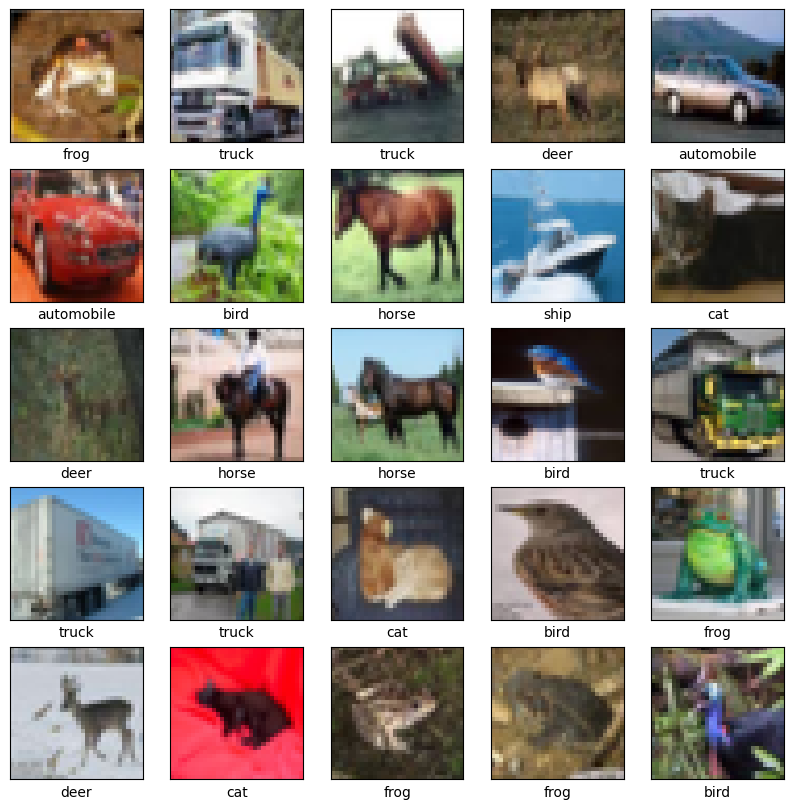

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training set and their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 77s 48ms/step - loss: 1.5083 - accuracy: 0.4482 - val_loss: 1.2840 - val_accuracy: 0.5385
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1471 - accuracy: 0.5938 - val_loss: 1.1277 - val_accuracy: 0.6105
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9972 - accuracy: 0.6470 - val_loss: 0.9679 - val_accuracy: 0.6613
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8940 - accuracy: 0.6872 - val_loss: 0.9429 - val_accuracy: 0.6731
Epoch 5/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8196 - accuracy: 0.7139 - val_loss: 0.8954 - val_accuracy: 0.6857
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7588 - accuracy: 0.7348 - val_loss: 0.8763 - val_accuracy: 0.6966
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7095 - accuracy: 0.7492 - val_loss: 0.8782 -

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")


313/313 - 3s - loss: 0.8919 - accuracy: 0.7067 - 3s/epoch - 11ms/step

Test accuracy: 0.7067000269889832


313/313 [==============================] - 5s 17ms/step
[1.5831470e-02 2.4637298e-03 1.3700553e-02 7.5843513e-01 1.5211124e-04
 5.9844863e-02 5.9559951e-03 7.9633278e-04 1.2782186e-01 1.4997895e-02]
Predicted class: cat
Actual class: cat


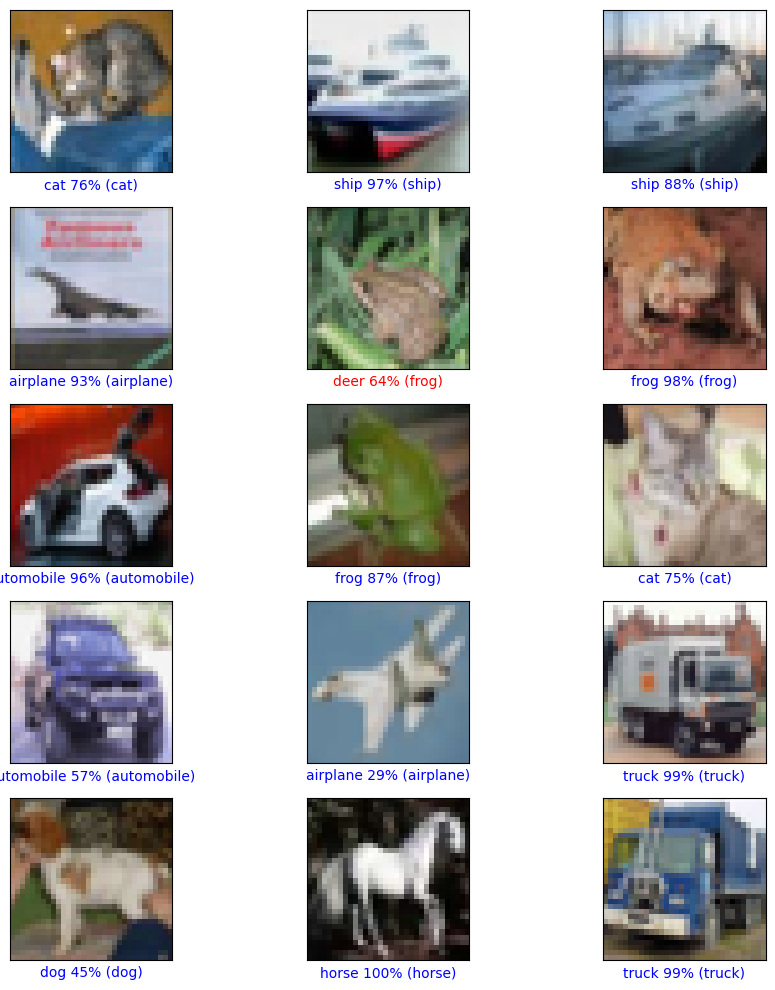

In [7]:
import numpy as np
# Add a softmax layer to convert logits to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

# Display the first prediction and its confidence
print(predictions[0])
print(f"Predicted class: {class_names[predictions[0].argmax()]}")
print(f"Actual class: {class_names[test_labels[0][0]]}")

# Function to plot the image along with prediction
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = predictions_array.argmax()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label[0]]})",
               color=color)

# Plot the first 15 test images, their predicted labels, and the true labels
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,3,i+1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
output_file_path = '/content/drive/MyDrive/Image_Image_Recognition.ipynb'